In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,balanced_accuracy_score,cohen_kappa_score,recall_score,precision_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [2]:
churn_df=pd.read_csv('/home/eeswar/Downloads/datasets/churn.csv')
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
churn_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
column=list(churn_df.columns)
for i in range(len(column)):
    column[i]=column[i].lower()
churn_df.columns=column

In [6]:
churn_df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [7]:
churn_df['totalcharges'].astype('float64')

ValueError: could not convert string to float: ' '

In [8]:
churn_df[churn_df['totalcharges']==' ']

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
churn_df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [10]:
mask=churn_df['totalcharges']==' '
churn_df.loc[mask,'totalcharges']=churn_df.loc[mask,'tenure']*churn_df.loc[mask,'monthlycharges']
churn_df.iloc[936]

customerid            5709-LVOEQ
gender                    Female
seniorcitizen                  0
partner                      Yes
dependents                   Yes
tenure                         0
phoneservice                 Yes
multiplelines                 No
internetservice              DSL
onlinesecurity               Yes
onlinebackup                 Yes
deviceprotection             Yes
techsupport                   No
streamingtv                  Yes
streamingmovies              Yes
contract                Two year
paperlessbilling              No
paymentmethod       Mailed check
monthlycharges             80.85
totalcharges                 0.0
churn                         No
Name: 936, dtype: object

In [11]:
churn_df['totalcharges']=churn_df['totalcharges'].astype('float64')

In [12]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


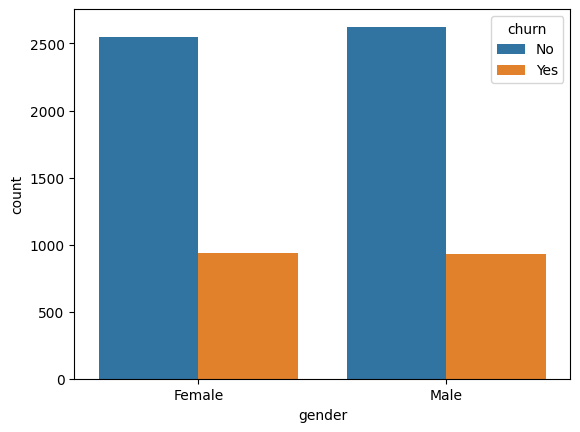

In [13]:
sns.countplot(x='gender',data=churn_df,hue='churn')
plt.show()

In [14]:
churn_df['churn'].value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

In [15]:
churn_df['gender'].value_counts()  #output=gender is not considered as the X variable since it is unable to much differentiate for target.

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [16]:
grouped=churn_df.groupby('seniorcitizen')['churn'].value_counts().reset_index()

In [17]:
grouped

,seniorcitizen,churn,count
0,0,No,4508
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


In [18]:
grouped['sen_churn']=grouped['seniorcitizen'].astype(str)+'_'+grouped['churn']

In [19]:
grouped

,seniorcitizen,churn,count,sen_churn
0,0,No,4508,0_No
1,0,Yes,1393,0_Yes
2,1,No,666,1_No
3,1,Yes,476,1_Yes


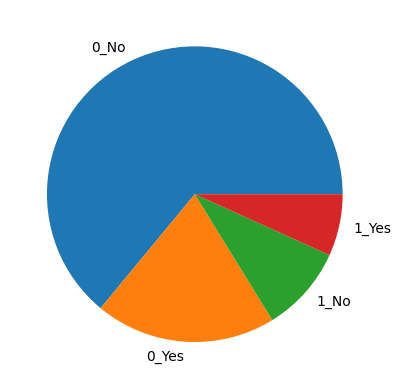

In [20]:
plt.pie(grouped['count'],data=grouped,labels=grouped['sen_churn'])
plt.show()

In [21]:
churn_df['seniorcitizen'].value_counts() #not much but can be considered since it is having more ratio to seperate if he is not 
                                         #senior citizen               

seniorcitizen
0    5901
1    1142
Name: count, dtype: int64

In [22]:
depend=churn_df.groupby('dependents')['churn'].value_counts().reset_index()

In [23]:
depend

,dependents,churn,count
0,No,No,3390
1,No,Yes,1543
2,Yes,No,1784
3,Yes,Yes,326


In [24]:
depend['dep_churn']=depend['dependents']+'_'+depend['churn']
depend

,dependents,churn,count,dep_churn
0,No,No,3390,No_No
1,No,Yes,1543,No_Yes
2,Yes,No,1784,Yes_No
3,Yes,Yes,326,Yes_Yes


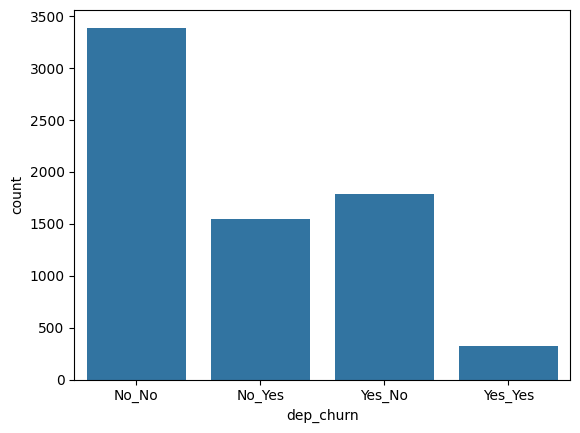

In [25]:
sns.barplot(x='dep_churn',y='count',data=depend)
plt.show()

In [26]:
churn_df['dependents'].value_counts()  #output=cannot much differntiate so cannot consider this.

dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [27]:
churn_df['tenure'].max()

72

In [28]:
churn_df['tenure'].min()

0

In [29]:
churn_df['tenure'].mean()

32.37114865824223

In [30]:
churn_df[churn_df['tenure']<=32]['churn'].value_counts()

churn
No     2315
Yes    1460
Name: count, dtype: int64

In [31]:
churn_df['churn'].value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

In [32]:
churn_df[churn_df['tenure']<=30]['churn'].value_counts()

churn
No     2216
Yes    1425
Name: count, dtype: int64

In [33]:
churn_df[(churn_df['tenure']>32)]['churn'].value_counts()

churn
No     2859
Yes     409
Name: count, dtype: int64

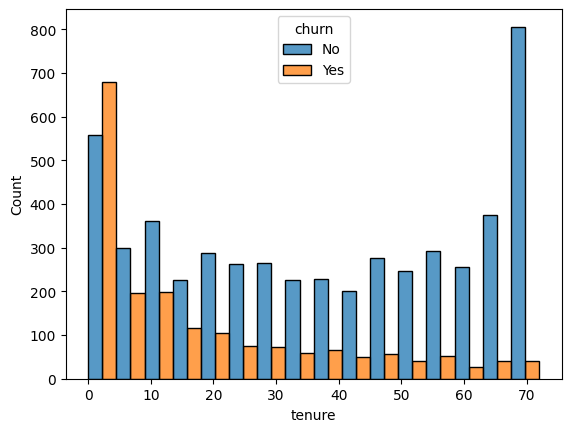

In [34]:
sns.histplot(data=churn_df, x='tenure', hue='churn',multiple='dodge')
plt.show()

In [35]:
#output=we could easily get the target variable yes or no since most of the customers are churning in a short period of time
        #and when tenure is more churning amount is less.

In [36]:
churn_df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
churn_df['phoneservice'].value_counts()

phoneservice
Yes    6361
No      682
Name: count, dtype: int64

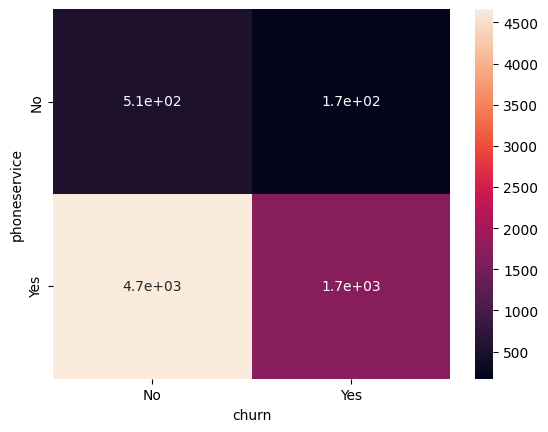

In [38]:
table=pd.crosstab(churn_df['phoneservice'],churn_df['churn'])
sns.heatmap(table,annot=True)
plt.show()

In [39]:
churn_df['phoneservice'].value_counts()

phoneservice
Yes    6361
No      682
Name: count, dtype: int64

In [40]:
churn_df['multiplelines'].value_counts()

multiplelines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [41]:
table=pd.crosstab(churn_df['multiplelines'],churn_df['churn'])

In [42]:
table

churn,No,Yes
multiplelines,,
No,2541,849
No phone service,512,170
Yes,2121,850


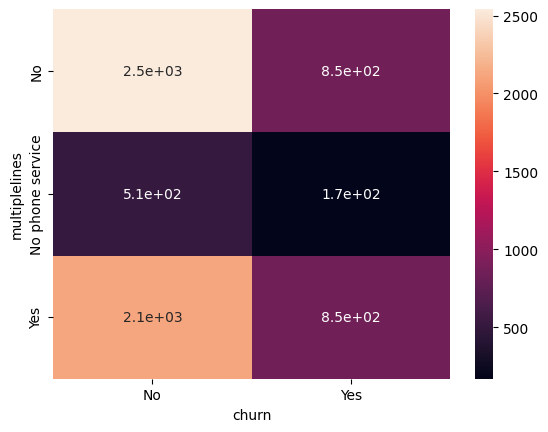

In [43]:
sns.heatmap(table,annot=True)
plt.show()

In [44]:
#output=let us check some more

In [45]:
churn_df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: Us

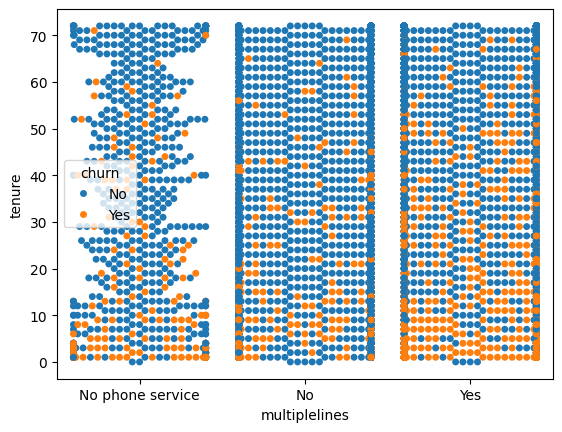

In [48]:
sns.swarmplot(y='tenure',x='multiplelines',data=churn_df,hue='churn')
plt.show()

In [46]:
#can be considered at some extent but not totally

In [47]:
churn_df['internetservice'].value_counts()

internetservice
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [48]:
table=pd.crosstab(churn_df['internetservice'],churn_df['churn'])
table

churn,No,Yes
internetservice,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [49]:
#output =by seeing this most of the people who selected fiberoptic had gone for churning
#so this can be considered and let us go for some more investigation

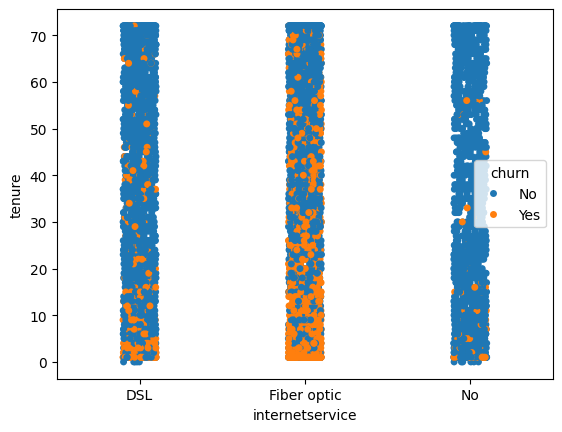

In [50]:
sns.stripplot(x='internetservice',y='tenure',data=churn_df,hue='churn')
plt.show()

/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 70.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 40.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: Us

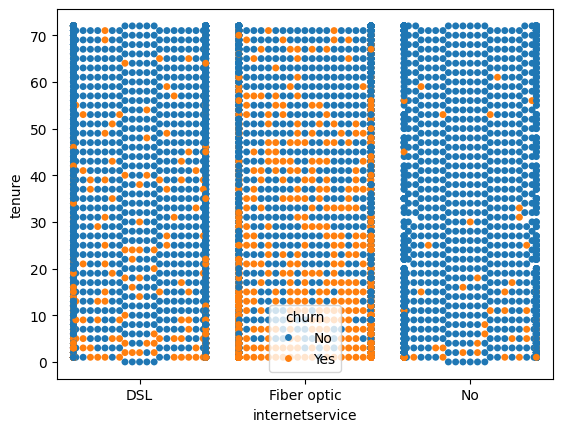

In [54]:
sns.swarmplot(x='internetservice',y='tenure',data=churn_df,hue='churn')
plt.show()

In [51]:
#output = could understand that mostly who chose for fiberoptic are churning and it can be considered as a factor

In [52]:
churn_df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [53]:
churn_df['onlinesecurity'].value_counts()

onlinesecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

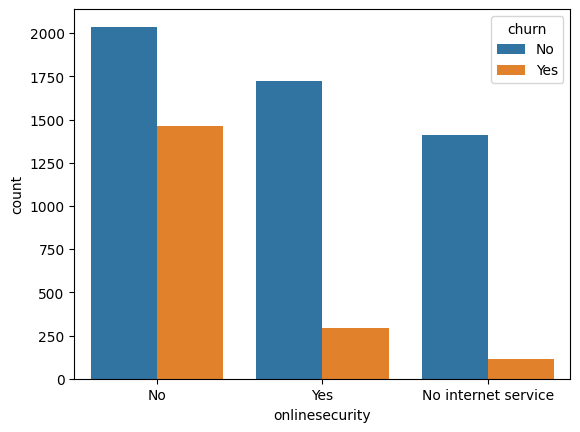

In [54]:
sns.countplot(x='onlinesecurity',data=churn_df,hue='churn')
plt.show()

In [55]:
table=pd.crosstab(churn_df['onlinesecurity'],churn_df['churn'])
table

churn,No,Yes
onlinesecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 53.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 40.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 80.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: Us

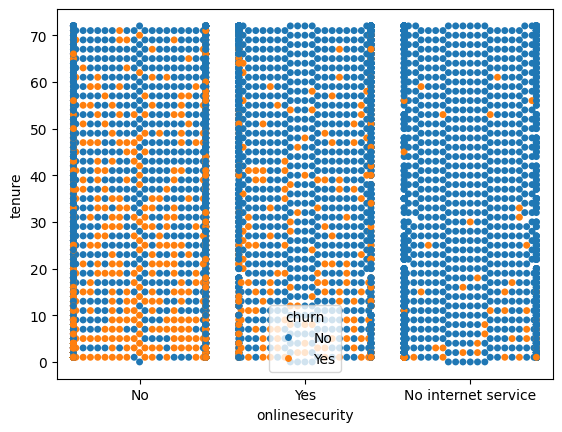

In [60]:
sns.swarmplot(x='onlinesecurity',y='tenure',data=churn_df,hue='churn')
plt.show()

In [56]:
#output=can be considered 

In [57]:
churn_df['onlinebackup'].value_counts()

onlinebackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

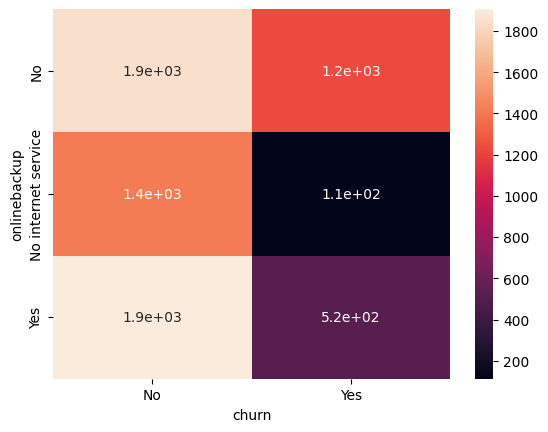

In [58]:
table=pd.crosstab(churn_df['onlinebackup'],churn_df['churn'])
sns.heatmap(table,annot=True)
plt.show()

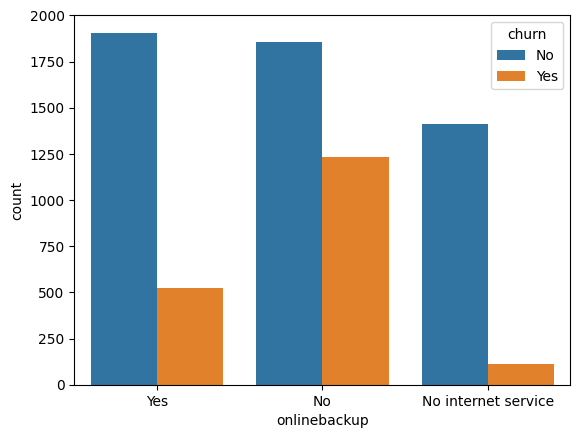

In [59]:
sns.countplot(x='onlinebackup',data=churn_df,hue='churn')
plt.show()

In [60]:
#output=can be considered at some extent as onlinebackup is dependent on internetservice and internetservice is considered so mostly it 
        #is not considered

In [61]:
churn_df['deviceprotection'].value_counts()

deviceprotection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [62]:
#output=Since device protection is mostly dependent on internetservice so it is not mostly considered as the dependent one
        #being considered that is internetservice

In [63]:
#As deviceprotection and internetservice has almost same value counts  and has most same values it is being dependent on internetservice

In [64]:
churn_df['techsupport'].value_counts()

techsupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [65]:
#output = Since techsupport is mostly dependent on online security so it is not mostly considered as the dependent one
          # is being considered that is onlinesecurity

In [66]:
#As onlinesecurity and techsupport has almost same value counts  and has most same values it is being dependent on onlinesecurity

In [67]:
churn_df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [68]:
churn_df['streamingtv'].value_counts()

streamingtv
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [69]:
grouped=churn_df.groupby('streamingtv')['churn'].value_counts().reset_index()

In [70]:
grouped

,streamingtv,churn,count
0,No,No,1868
1,No,Yes,942
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1893
5,Yes,Yes,814


In [71]:
churned=grouped[grouped['churn']=='Yes']
nochurn=grouped[grouped['churn']=='No']
print(nochurn)
churned

           streamingtv churn  count
0                   No    No   1868
2  No internet service    No   1413
4                  Yes    No   1893


,streamingtv,churn,count
1,No,Yes,942
3,No internet service,Yes,113
5,Yes,Yes,814


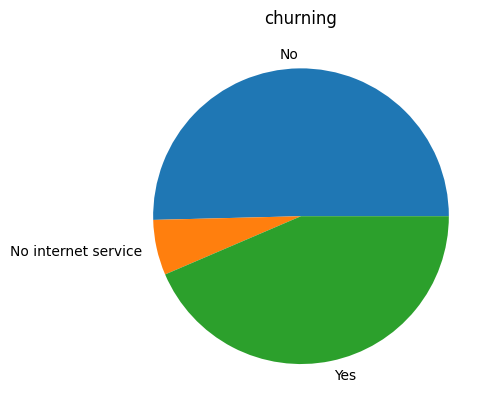

In [72]:
plt.pie(churned['count'],data=churned,labels=churned['streamingtv'])
plt.title('churning')
plt.show()

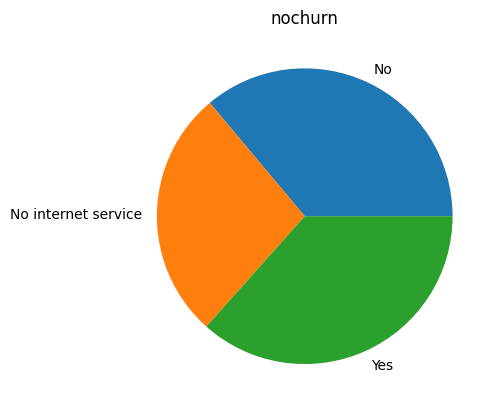

In [73]:
plt.pie(nochurn['count'],data=nochurn,labels=nochurn['streamingtv'])
plt.title('nochurn')
plt.show()

In [74]:
#output = in churning streamingtv and not streamingtv contributing same amount and cannot be easily differentiated
          #so it cannot be considered

In [75]:
churn_df['contract'].value_counts()

contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [76]:
table=pd.crosstab(churn_df['contract'],churn_df['churn'])
table

churn,No,Yes
contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [77]:
#it can be considered since mostly month-to-month contract are churning mostly

In [78]:
churn_df['paperlessbilling'].value_counts()

paperlessbilling
Yes    4171
No     2872
Name: count, dtype: int64

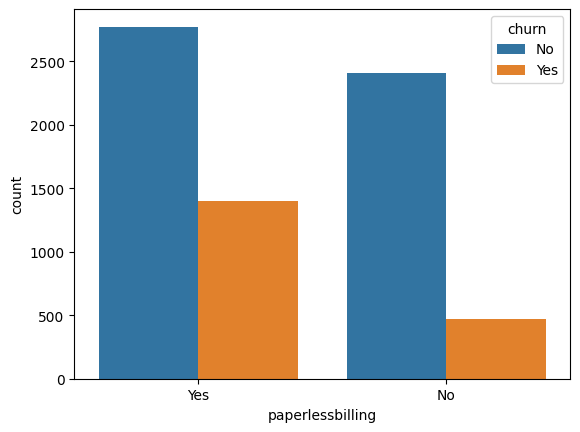

In [79]:
sns.countplot(x='paperlessbilling',data=churn_df,hue='churn')
plt.show()

In [80]:
churn_df['churn'].value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

In [81]:
#let us investigate some more

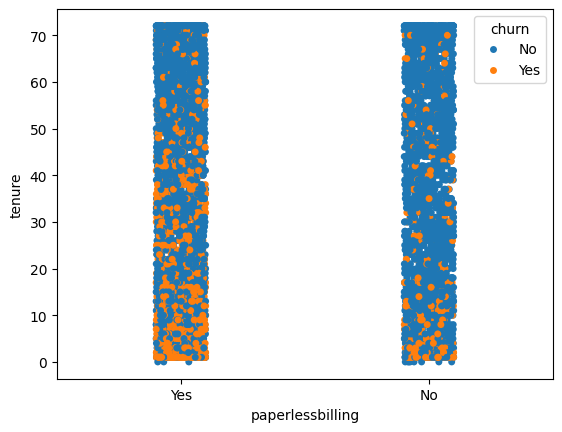

In [82]:
sns.stripplot(x='paperlessbilling',y='tenure',data=churn_df,hue='churn')
plt.show()

In [83]:
#output = can be considered at some extent as it is able to get and differentiate churned but unable to differentiate not churned ones to
          #at some extent as it has minimally same value counts

In [84]:
churn_df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [85]:
churn_df['paymentmethod'].value_counts()

paymentmethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

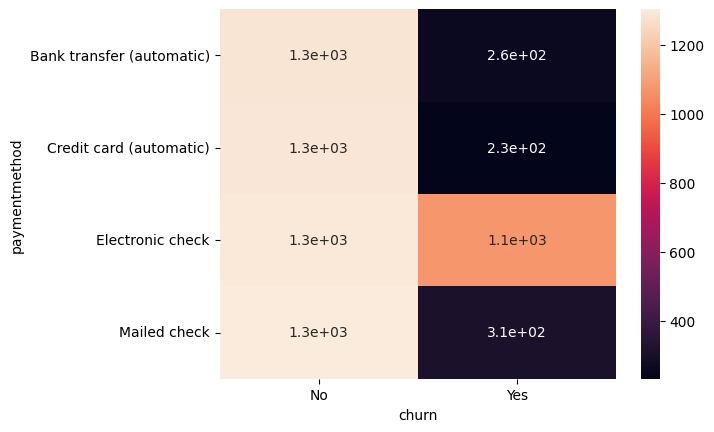

In [86]:
table=pd.crosstab(churn_df['paymentmethod'],churn_df['churn'])
sns.heatmap(table,annot=True)
plt.show()

In [87]:
#output = cannot be considered since most of the values are same

In [88]:
churn_df['monthlycharges'].dtype

dtype('float64')

In [89]:
churn_df['monthlycharges'].mean()

64.76169246059918

In [90]:
churn_df['monthlycharges'].max(),churn_df['monthlycharges'].min()

(118.75, 18.25)

In [91]:
churn_df[churn_df['monthlycharges']<=62.76]['churn'].value_counts()

churn
No     2531
Yes     508
Name: count, dtype: int64

In [92]:
churn_df[churn_df['monthlycharges']>62.76]['churn'].value_counts()

churn
No     2643
Yes    1361
Name: count, dtype: int64

In [93]:
#should investigate some more

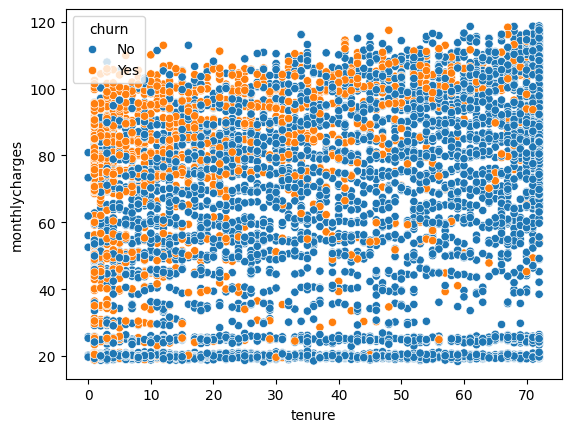

In [94]:
sns.scatterplot(x='tenure',y='monthlycharges',data=churn_df,hue='churn')
plt.show()

/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 70.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 40.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: Us

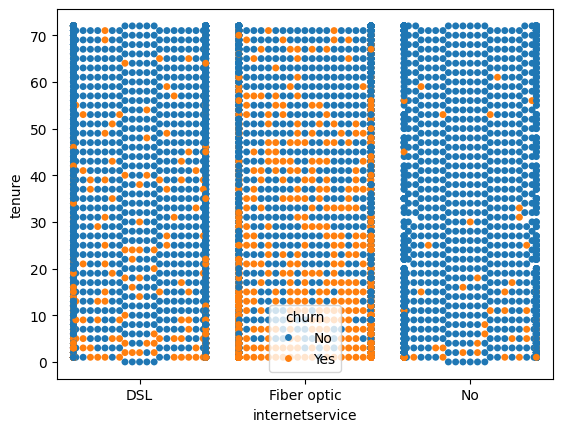

In [100]:
sns.swarmplot(x='internetservice',y='tenure',data=churn_df,hue='churn')
plt.show()

/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 67.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 79.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 93.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 75.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eeswar/.local/lib/python3.10/site-packages/seaborn/categorical.py:3370: Us

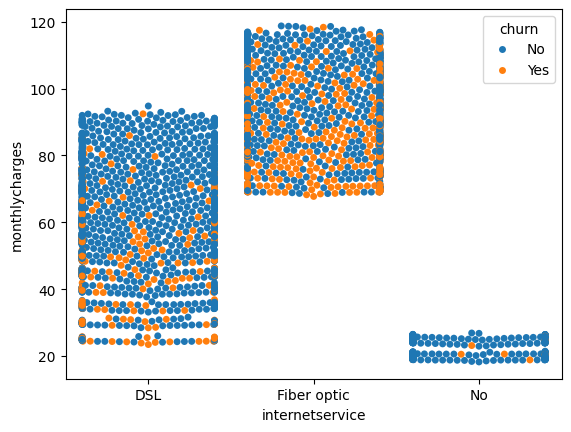

In [101]:
sns.swarmplot(x='internetservice',y='monthlycharges',data=churn_df,hue='churn')
plt.show()

In [95]:
#output = people who opted for fibre optics have more monthly charges and are churning and monthly charges are dependent on 
         #internetservice and can be considered as when plotted against tenure is able differentiate mostly.

In [96]:
churn_df['totalcharges'].min(),churn_df['totalcharges'].max()

(0.0, 8684.8)

In [97]:
churn_df['totalcharges'].mean()

2279.7343035638223

In [98]:
churn_df[churn_df['totalcharges']>2279.734]['churn'].value_counts()

churn
No     2173
Yes     476
Name: count, dtype: int64

In [99]:
churn_df[churn_df['totalcharges']<=2279.734]['churn'].value_counts()

churn
No     3001
Yes    1393
Name: count, dtype: int64

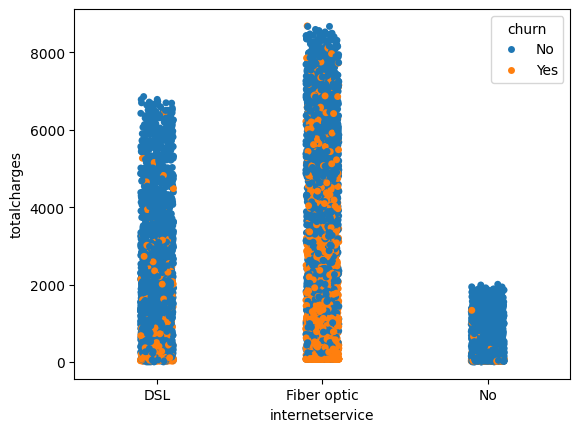

In [100]:
sns.stripplot(x='internetservice',y='totalcharges',data=churn_df,hue='churn')
plt.show()

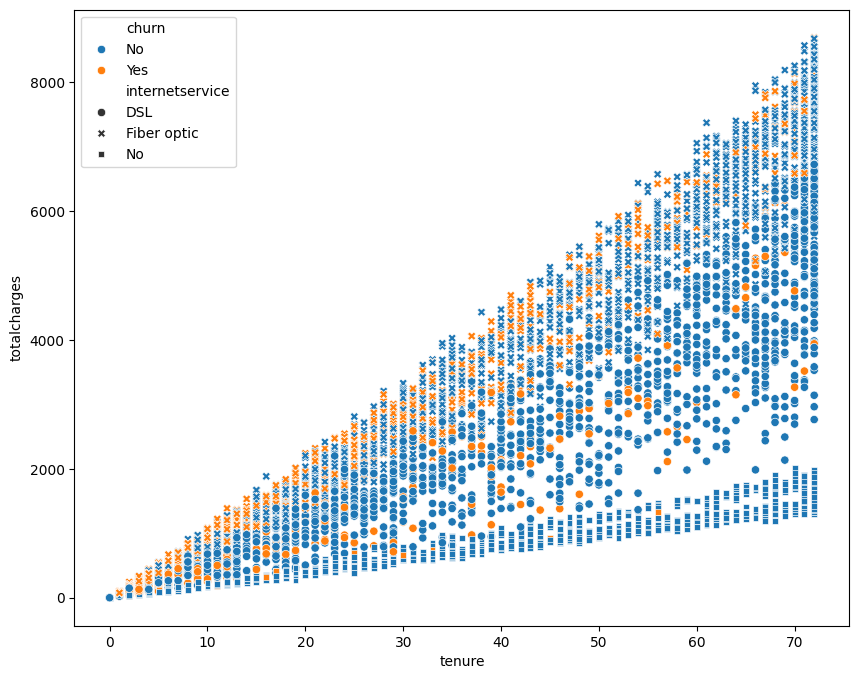

In [101]:
plt.figure(figsize=[10,8])
sns.scatterplot(x='tenure',y='totalcharges',hue='churn',style='internetservice',data=churn_df)
plt.show()

In [102]:
#output=totalcharges can be considered as a dependent variable

In [103]:
#let us check if two variables on a combination can predict churns at a higher rate

In [16]:
X=churn_df[['tenure','phoneservice','monthlycharges','internetservice','contract','paymentmethod','totalcharges','techsupport'
           ,'onlinesecurity']]
y=churn_df['churn']

In [17]:
Le=LabelEncoder()
Oe=OrdinalEncoder()
X=Oe.fit_transform(X)
y=Le.fit_transform(y)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=14)

In [809]:
model = LogisticRegression(C=10, solver='liblinear', max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=500, solver='liblinear')

In [810]:
model.score(X_test,y_test)

0.8109028960817717

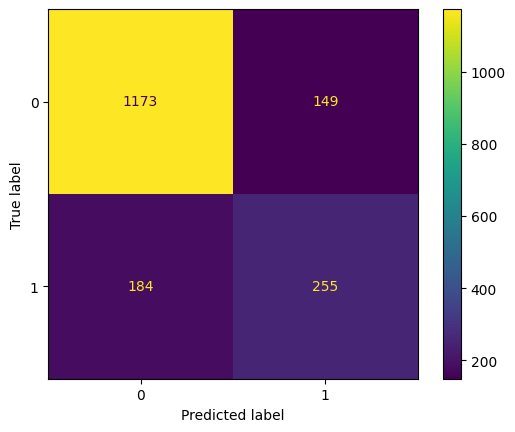

In [812]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
plt.show()

In [813]:
y_predict=model.predict(X_test)

In [814]:
cohen_kappa_score(y_test,y_predict)

0.48096363020009536

In [305]:
churn_df['internetservice'].value_counts()

internetservice
fiber optic    3096
dsl            2421
no             1526
Name: count, dtype: int64

In [314]:
dsl=churn_df[churn_df['internetservice']=='dsl']

In [315]:
dsl

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,dsl,No,...,No,No,No,No,month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,dsl,Yes,...,Yes,No,No,No,one year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,dsl,Yes,...,No,No,No,No,month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,dsl,Yes,...,Yes,Yes,No,No,one year,No,Bank transfer (automatic),42.30,1840.75,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,dsl,Yes,...,No,No,No,No,month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,dsl,No,...,No,No,Yes,Yes,month-to-month,Yes,Electronic check,44.40,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,dsl,Yes,...,No,No,No,No,one year,No,Credit card (automatic),60.00,3316.10,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,dsl,No,...,Yes,Yes,Yes,Yes,one year,No,Electronic check,60.65,743.30,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,dsl,Yes,...,Yes,Yes,Yes,Yes,one year,Yes,Mailed check,84.80,1990.50,No


In [319]:
dsl.monthlycharges.max()

94.8

In [316]:
churn_df[churn_df['internetservice']=='fiber optic']['monthlycharges'].mean()

91.50012919896642

In [320]:
dsl.monthlycharges.min()

23.45

In [321]:
dsl.tenure.mean()

32.82156133828996

In [324]:
tenu_32=dsl[dsl['tenure']<=32.82]

In [325]:
dsl.churn.value_counts()

churn
No     1962
Yes     459
Name: count, dtype: int64

In [326]:
tenu_32

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,dsl,No,...,No,No,No,No,month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,dsl,Yes,...,No,No,No,No,month-to-month,Yes,Mailed check,53.85,108.15,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,dsl,Yes,...,No,No,No,No,month-to-month,No,Mailed check,29.75,301.90,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,dsl,Yes,...,No,No,No,No,month-to-month,Yes,Mailed check,49.95,587.45,No
18,4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,dsl,No,...,Yes,Yes,No,No,month-to-month,No,Credit card (automatic),55.20,528.35,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0550-DCXLH,Male,0,No,No,13,Yes,No,dsl,No,...,No,Yes,Yes,Yes,month-to-month,No,Mailed check,73.35,931.55,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,dsl,No,...,No,No,Yes,Yes,month-to-month,Yes,Electronic check,44.40,263.05,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,dsl,No,...,Yes,Yes,Yes,Yes,one year,No,Electronic check,60.65,743.30,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,dsl,Yes,...,Yes,Yes,Yes,Yes,one year,Yes,Mailed check,84.80,1990.50,No


In [327]:
tenu_32.monthlycharges.mean()

51.53161189358372

In [328]:
dsl.monthlycharges.mean()

58.10216852540273

In [329]:
tenu_32.groupby('onlinebackup')['churn'].value_counts()

onlinebackup  churn
No            No       591
              Yes      313
Yes           No       304
              Yes       70
Name: count, dtype: int64

In [330]:
tenu_32.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [331]:
tenu_32.groupby('multiplelines')['churn'].value_counts()

multiplelines     churn
No                No       493
                  Yes      194
No phone service  No       228
                  Yes      137
Yes               No       174
                  Yes       52
Name: count, dtype: int64

In [333]:
tenu_32.shape

(1278, 21)

In [334]:
tenu_32.groupby('onlinesecurity')['churn'].value_counts()

onlinesecurity  churn
No              No       553
                Yes      306
Yes             No       342
                Yes       77
Name: count, dtype: int64

In [351]:
churn_df['internetservice'].value_counts()

internetservice
fiber optic    3096
dsl            2421
no             1526
Name: count, dtype: int64

In [352]:
tenu_32.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [353]:
tenu_32.groupby('deviceprotection')['churn'].value_counts()

deviceprotection  churn
No                No       640
                  Yes      306
Yes               No       255
                  Yes       77
Name: count, dtype: int64

In [414]:
churned=tenu_32[tenu_32['churn']=='Yes']

In [415]:
churned

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,dsl,Yes,...,No,No,No,No,month-to-month,Yes,Mailed check,53.85,108.15,Yes
18,4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,dsl,No,...,Yes,Yes,No,No,month-to-month,No,Credit card (automatic),55.20,528.35,Yes
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,dsl,No,...,Yes,No,No,Yes,month-to-month,Yes,Electronic check,39.65,39.65,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,dsl,No,...,No,No,No,No,month-to-month,No,Electronic check,30.20,30.20,Yes
29,8773-HHUOZ,Female,0,No,Yes,17,Yes,No,dsl,No,...,No,No,Yes,Yes,month-to-month,Yes,Mailed check,64.70,1093.10,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999,2108-XWMPY,Male,0,No,No,3,No,No phone service,dsl,Yes,...,No,No,No,No,month-to-month,Yes,Mailed check,35.45,106.85,Yes
7001,6304-IJFSQ,Male,0,No,No,3,Yes,No,dsl,No,...,No,No,No,No,month-to-month,Yes,Mailed check,49.90,130.10,Yes
7011,5482-NUPNA,Female,0,No,No,4,Yes,No,dsl,Yes,...,No,Yes,No,No,month-to-month,Yes,Mailed check,60.40,272.15,Yes
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,dsl,No,...,No,Yes,Yes,No,one year,Yes,Electronic check,59.80,727.80,Yes


In [403]:
churned['multiplelines'].value_counts()

multiplelines
No                  194
No phone service    137
Yes                  52
Name: count, dtype: int64

In [416]:
churned['tenure'].max()

31

In [371]:
churned['paperlessbilling'].value_counts()

paperlessbilling
Yes    243
No     140
Name: count, dtype: int64

In [417]:
churned['deviceprotection'].value_counts()

deviceprotection
No     306
Yes     77
Name: count, dtype: int64

In [418]:
churn_df['deviceprotection'].value_counts()

deviceprotection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [394]:
churned['phoneservice'].value_counts()

phoneservice
Yes    246
No     137
Name: count, dtype: int64

In [372]:
churned['streamingmovies'].value_counts()

streamingmovies
No     291
Yes     92
Name: count, dtype: int64

In [373]:
churned['contract'].value_counts()

contract
month-to-month    362
one year           21
Name: count, dtype: int64

In [374]:
churned['streamingtv'].value_counts()

streamingtv
No     297
Yes     86
Name: count, dtype: int64

In [375]:
churn_df.groupby('streamingtv')['churn'].value_counts()

streamingtv          churn
No                   No       1868
                     Yes       942
No internet service  No       1413
                     Yes       113
Yes                  No       1893
                     Yes       814
Name: count, dtype: int64

In [386]:
nointer

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,two year,No,Credit card (automatic),18.95,326.80,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,one year,No,Mailed check,20.65,1022.95,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,one year,No,Bank transfer (automatic),19.80,202.25,No
22,1066-JKSGK,Male,0,No,No,1,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,month-to-month,No,Mailed check,20.15,20.15,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,month-to-month,No,Bank transfer (automatic),20.20,20.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,Female,0,No,No,51,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,9710-NJERN,Female,0,No,No,39,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,two year,No,Mailed check,20.15,826.00,No
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,month-to-month,Yes,Electronic check,19.20,239.00,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,month-to-month,Yes,Mailed check,20.05,39.25,No


In [419]:
churned=nointer[nointer['churn']=='Yes']

In [420]:
churned

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
22,1066-JKSGK,Male,0,No,No,1,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,month-to-month,No,Mailed check,20.15,20.15,Yes
97,0278-YXOOG,Male,0,No,No,5,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,month-to-month,No,Mailed check,21.05,113.85,Yes
268,6323-AYBRX,Male,0,No,No,59,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,two year,No,Mailed check,19.35,1099.60,Yes
385,4895-TMWIR,Male,1,Yes,No,11,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,month-to-month,No,Mailed check,19.95,214.75,Yes
408,4800-VHZKI,Female,0,No,No,1,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,month-to-month,Yes,Mailed check,19.90,19.90,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6558,4488-PSYCG,Male,0,No,No,16,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,month-to-month,No,Bank transfer (automatic),20.25,327.45,Yes
6609,1000-AJSLD,Male,0,No,No,1,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,month-to-month,Yes,Mailed check,20.10,20.10,Yes
6789,7839-QRKXN,Female,0,No,No,1,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,month-to-month,Yes,Mailed check,20.20,20.20,Yes
6792,4597-ELFTS,Male,0,No,No,56,Yes,Yes,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,one year,No,Electronic check,24.90,1334.00,Yes


In [390]:
churned['phoneservice'].value_counts()

phoneservice
Yes    113
Name: count, dtype: int64

In [407]:
churned['multiplelines'].value_counts()

multiplelines
No     103
Yes     10
Name: count, dtype: int64

In [436]:
churned['contract'].value_counts()

contract
month-to-month    99
one year           9
two year           5
Name: count, dtype: int64

In [437]:
one=churned[churned['contract']=='one year']

In [438]:
one

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
658,4464-JCOLN,Male,0,Yes,Yes,2,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,one year,No,Mailed check,19.85,35.90,Yes
842,1038-ZAGBI,Female,0,Yes,Yes,12,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,one year,No,Bank transfer (automatic),19.80,229.60,Yes
1494,2667-WYLWJ,Female,0,Yes,Yes,8,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,one year,Yes,Mailed check,19.75,145.00,Yes
1780,0516-VRYBW,Female,0,No,Yes,18,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,one year,No,Bank transfer (automatic),20.15,390.85,Yes
2536,0203-HHYIJ,Male,0,No,No,25,Yes,Yes,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,one year,No,Bank transfer (automatic),25.30,676.35,Yes
3790,6598-RFFVI,Male,0,No,No,2,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,one year,No,Credit card (automatic),19.30,28.30,Yes
4795,6532-YLWSI,Female,0,Yes,No,53,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,one year,No,Bank transfer (automatic),20.80,1021.80,Yes
5086,3705-PSNGL,Male,0,No,No,45,Yes,No,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,one year,Yes,Electronic check,20.40,930.45,Yes
6792,4597-ELFTS,Male,0,No,No,56,Yes,Yes,no,No internet service,...,No internet service,No internet service,No internet service,No internet service,one year,No,Electronic check,24.90,1334.00,Yes


In [455]:
from sklearn.ensemble import BaggingClassifier

In [567]:
model=BaggingClassifier(LogisticRegression(max_iter=300),n_estimators=14,max_samples=4800)

In [577]:
model.fit(X_train,y_train)

BaggingClassifier(estimator=LogisticRegression(max_iter=300), max_samples=4800,
                  n_estimators=14)

In [578]:
model.score(X_test,y_test)

0.8086314593980692

In [572]:
X_train.shape

(5282, 4)

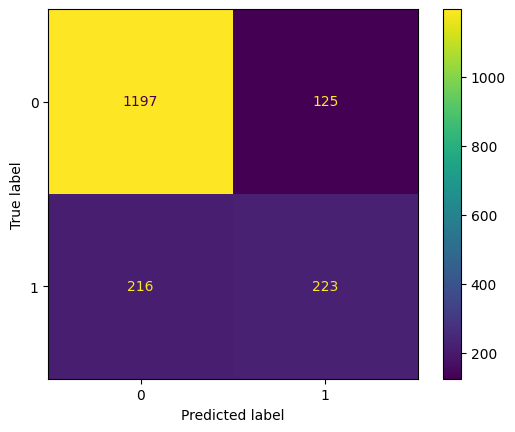

In [559]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
plt.show()

In [15]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
model=AdaBoostClassifier(LogisticRegression(C=10, solver='liblinear', max_iter=500),n_estimators=100,learning_rate=0.5)

In [20]:
model.fit(X_train,y_train)

/home/eeswar/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=LogisticRegression(C=10, max_iter=500,
                                                solver='liblinear'),
                   learning_rate=0.5, n_estimators=100)

In [21]:
model.score(X_test,y_test)

0.8245315161839863

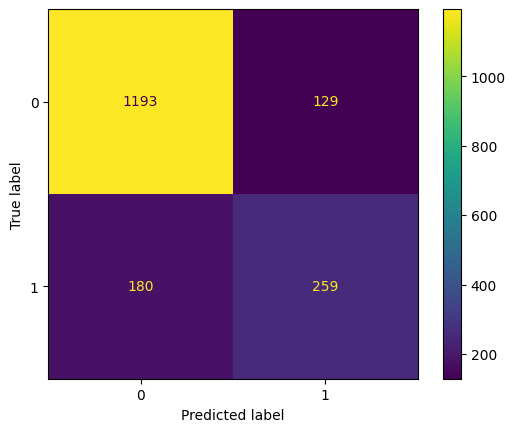

In [22]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [23]:
y_predict=model.predict(X_test)

In [24]:
cohen_kappa_score(y_test,y_predict)

0.5122727513101839

In [25]:
recall_score(y_test,y_predict,pos_label=1)

0.5899772209567198